![Cart Spring Problem Question and Diagram](imgs/cart_spring_cargo/question.png)

Let $x_1$, $x_2$ and $x_3$ be the distance in the x direction from equilibrium position for bodies $m_1$, $m_2$ and $m_3$ respectively

In [22]:
# Variable definitions
from mathpad import *
from IPython.display import display

x1 = "x1(t)" * m
v1 = diff(x1)
m1 = "m1" * kg

x2 = "x2(t)" * m
v2 = diff(x2)
m2 = "m2" * kg

x3 = "x3(t)" * m
v3 = diff(x3)
m3 = "m3" * kg

c = "c" * N * s / m
F = "F(t)" * N

k1 = "k1" * N / m
k2 = "k2" * N / m

# Part A

<ins>Derive the equations of motion for this system using the direct (i.e. Newton-Euler) approach.<br />Be sure to draw any necessary Free Body Diagrams.</ins>

## FBD @ m1
![Free Body Diagram 1](imgs/cart_spring_cargo/FBD_1.png)

Assume $N = -mg$

In [2]:
print("Sum of Forces on body m2 in the i direction:")
m1_sum_forces_i = F + k1 * (x2 - x1) + c * (v2 - v1) + c * (v3 - v1)
m1_sum_forces_i

Sum of Forces on body m2 in the i direction:


-c*(Derivative(x1(t), t) - Derivative(x2(t), t)) - c*(Derivative(x1(t), t) - Derivative(x3(t), t)) - k(x1(t) - x2(t)) + F(t) newtons



## FBD @ m2
![Free Body Diagram 2](imgs/cart_spring_cargo/FBD_2.png)

Assume $N = -mg$

In [15]:
print("Sum of Forces on body m1 in the i direction:")
m2_sum_forces_i = k2 * (x3 - x2) - c * (v2 - v1) - k1 * (x2 - x1)
m2_sum_forces_i

Sum of Forces on body m1 in the i direction:


c*(Derivative(x1(t), t) - Derivative(x2(t), t)) + k(x1(t) - x2(t)) - k2*(x2(t) - x3(t)) newtons



## FBD @ m3
![Free Body Diagram 3](imgs/cart_spring_cargo/FBD_3.png)

Assume $N = -mg$

In [20]:
print("Sum of Forces on body m3 in the i direction:")
m3_sum_forces_i = - c * (v3 - v1) - k2 * (x3 - x2)
m3_sum_forces_i

Sum of Forces on body m3 in the i direction:


c*(Derivative(x1(t), t) - Derivative(x3(t), t)) + k2*(x2(t) - x3(t)) newtons

## Simulation Results

Solving subbed Equations
Solving finished. Simulating...


  0%|          | 0/10 [00:00<?, ?it/s]

Simulation finished. Plotting...


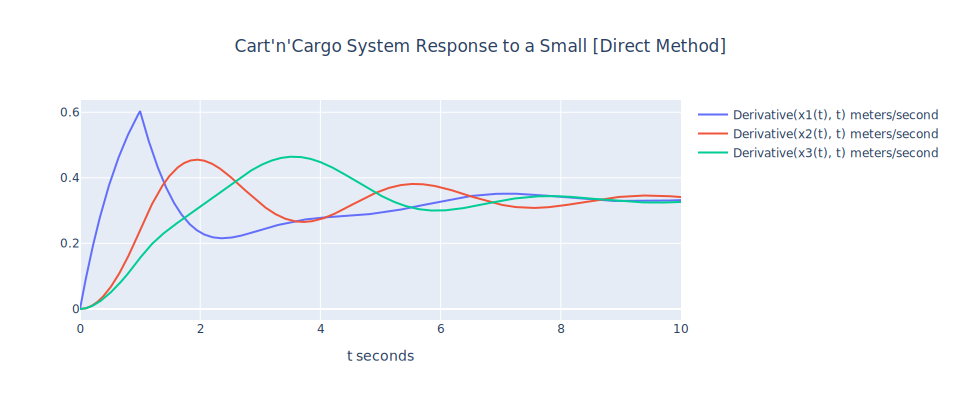

In [21]:
system_dynamics = [
    m1 * diff(v1) == m1_sum_forces_i,
    m2 * diff(v2) == m2_sum_forces_i,
    m3 * diff(v3) == m3_sum_forces_i,
]

sim_data = simulate_dynamic_system(
    system_dynamics,
    plot_title="Cart'n'Cargo System Response to a Small [Direct Method]",
    x_f=10, max_step=0.01,
    substitute={
        k1: 1,
        k2: 1,
        m1: 1,
        m2: 1,
        m3: 1,
        c: 0.5,
        # A small perturbation
        F: piecewise(t, [(1, 1 * N), (float('inf'), 0 * N)]),
    },
    initial_conditions={
        x1: 0,
        diff(x1): 0, 
        x2: 0,
        diff(x2): 0,
        x3: 0,
        diff(x3): 0
    },
    record=diff([x1, x2, x3]), # type: ignore
    plot_static=True
)

# Part B

<ins>Repeat a) using lagrange's equations. Be sure to specify any generalized coordinates</ins>



In [6]:
# Kinetic energy
from mathpad.mech import kinetic_energy, elastic_energy, euler_lagrange

print("Kinetic Energy")
T = kinetic_energy(m1, diff(x1)) + kinetic_energy(m2, diff(x2)) + kinetic_energy(m3, diff(x3))
T

Kinetic Energy


0.5*mDerivative(x1(t), t)**2 + 0.5*m2*Derivative(x2(t), t)**2 + 0.5*m3*Derivative(x3(t), t)**2 kilogram*meters**2/second**2

In [7]:
print("Potential Energy")
V = elastic_energy(k1, x2 - x1) + elastic_energy(k2, x3 - x2)
V

Potential Energy


0.5*k(x1(t) - x2(t))**2 + 0.5*k2*(x2(t) - x3(t))**2 meter*newtons

In [8]:
print("Damping Force between bodies 1 & 2:")
Fc2 = c * diff(x2 - x1)
display(Fc2)

print("Damping Force between bodies 1 & 3:")
Fc3 = c * diff(x3 - x1)
display(Fc3)

Damping Force between bodies 1 & 2:


c*(-Derivative(x1(t), t) + Derivative(x2(t), t)) newtons

Damping Force between bodies 1 & 3:


c*(-Derivative(x1(t), t) + Derivative(x3(t), t)) newtons

In [9]:
print("Non-Conservative Forces @ Body 1")
Qx1 = F + Fc2 + Fc3
display(Qx1)

print("Dynamics of Body 1")
x1_dynamics = euler_lagrange(T, V, Qx1, x1)
x1_dynamics

Non-Conservative Forces @ Body 1


-2*c*Derivative(x1(t), t) + c*Derivative(x2(t), t) + c*Derivative(x3(t), t) + F(t) newtons

Dynamics of Body 1


k(x1(t) - x2(t)) + mDerivative(x1(t), (t, 2)) = -2*c*Derivative(x1(t), t) + c*Derivative(x2(t), t) + c*Derivative(x3(t), t) + F(t) kilogram*meter/second**2

In [10]:
print("Non-Conservative Forces @ Body 2")
Qx2 = -Fc2
display(Qx2)

print("Dynamics of Body 2")
x2_dynamics = euler_lagrange(T, V, Qx2, x2)
x2_dynamics

Non-Conservative Forces @ Body 2


-c*(-Derivative(x1(t), t) + Derivative(x2(t), t)) newtons

Dynamics of Body 2


-k(x1(t) - x2(t)) + k2*(x2(t) - x3(t)) + m2*Derivative(x2(t), (t, 2)) = -c*(-Derivative(x1(t), t) + Derivative(x2(t), t)) kilogram*meter/second**2

In [11]:
print("Non-Conservative Forces @ Body 3")
Qx3 = -Fc3
display(Qx3)

print("Dynamics of Body 3")
x3_dynamics = euler_lagrange(T, V, Qx3, x3)
x3_dynamics

Non-Conservative Forces @ Body 3


-c*(-Derivative(x1(t), t) + Derivative(x3(t), t)) newtons

Dynamics of Body 3


-k2*(x2(t) - x3(t)) + m3*Derivative(x3(t), (t, 2)) = -c*(-Derivative(x1(t), t) + Derivative(x3(t), t)) kilogram*meter/second**2

## Simulation Results

Solving subbed Equations
Solving finished. Simulating...


  0%|          | 0/10 [00:00<?, ?it/s]

Simulation finished. Plotting...


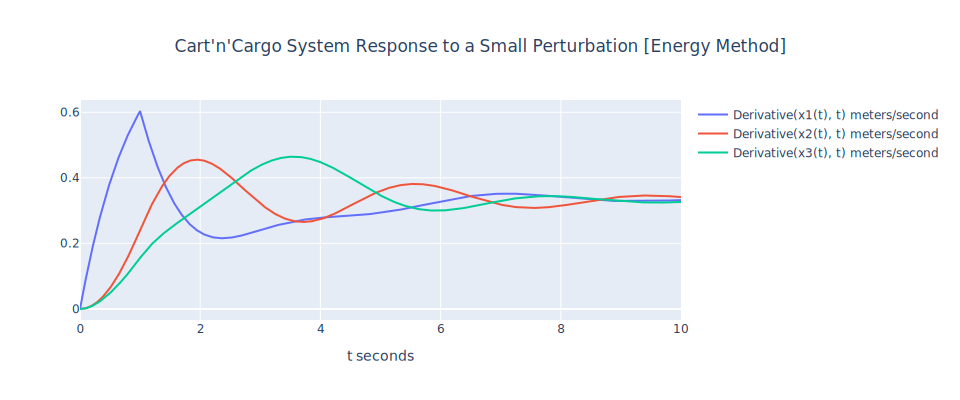

In [12]:
system_dynamics = [
    x1_dynamics,
    x2_dynamics,
    x3_dynamics,
]

sim_data = simulate_dynamic_system(
    system_dynamics,
    plot_title="Cart'n'Cargo System Response to a Small Perturbation [Energy Method]",
    x_f=10, max_step=0.01,
    substitute={
        k1: 1,
        k2: 1,
        m1: 1,
        m2: 1,
        m3: 1,
        c: 0.5,
        # A small perturbation
        F: piecewise(t, [(1, 1 * N), (float('inf'), 0 * N)]),
    },
    initial_conditions={
        x1: 0,
        diff(x1): 0, 
        x2: 0,
        diff(x2): 0,
        x3: 0,
        diff(x3): 0
    },
    record=diff([x1, x2, x3]), # type: ignore
    plot_static=True
)

## Analysis

As both sets of equations produce the same output, the answers are more likely correct.